# Exploratory Data Analysis

## 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np

sheets_dict = pd.read_excel('../../data/raw_data/full_data.xlsx',
                            sheet_name=['Переменные', 'data_full'])

params = sheets_dict['Переменные']
full_data = sheets_dict['data_full']

full_data.head(3)

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
0,1,Магнитогорский,Иностранные,Челябинская область,NaN,TOYOTA,RAV 4,2018,Нет,Состоит в браке,...,42,24,1.00,1400000,M,0,55000,0.040,0,0
1,2,Магнитогорский,Отечественные,Челябинская область,NaN,LADA,GRANTA,2016,Нет,Состоит в браке,...,41,4,1.05,200000,M,0,10000,0.010,0,0
2,3,Ростовский,Отечественные,Ростовская область,NaN,LADA,GRANTA,2018,Нет,Не состоит в браке,...,49,20,0.95,400000,F,0,30000,0.065,1,1


### Переменные

In [2]:
params

,id,ID договора
0,Filial,Филиал продажи
1,Type_ts,Тип ТС
2,passport_region,Регион по серии паспорта
3,VIP,VIP клиент
4,Brand,Марка ТС
5,Model,Модель ТС
6,Yr_production,Год выпуска ТС
7,GAP,GAP застрахован
8,married,Брак
9,KBM,КБМ


## 2. Отделим новые данные от обучающих

In [3]:
new_data = full_data[full_data['target'] == -1]
new_data.head(1)

,ID,Filial,Type_ts,passport_region,VIP,Brand,Model,Yr_production,GAP,married,...,Age,Exp,discount,Amount - gr,sex,premium_car,price_gr,price_prc,OSAGO_clnt,target
7598,7599,Московский,Иностранные,Москва,NaN,HYUNDAI,CRETA,2017,Да,Состоит в браке,...,40,20,1.0,1000000,M,0,25000,0.025,1,-1


In [4]:
full_train_data = full_data.drop(full_data[full_data['target'] == -1].index)

Сохраним данные в формате csv

In [5]:
full_train_data.to_csv('../../data/raw_data/full_train_data_csv.csv', index=False)

In [6]:
new_data.to_csv('../../data/raw_data/new_data_csv.csv', index=False)

## 3. Общая информация о данных

In [7]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7598 entries, 0 to 7597
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               7598 non-null   int64  
 1   Filial           7598 non-null   object 
 2   Type_ts          7598 non-null   object 
 3   passport_region  7598 non-null   object 
 4   VIP              208 non-null    object 
 5   Brand            7598 non-null   object 
 6   Model            7598 non-null   object 
 7   Yr_production    7598 non-null   int64  
 8   GAP              7598 non-null   object 
 9   married          7598 non-null   object 
 10  KBM              7598 non-null   int64  
 11  KBM_prol_est     7598 non-null   int64  
 12  delta_kbm        7598 non-null   int64  
 13  deduct           7598 non-null   object 
 14  deduct_amount    7598 non-null   object 
 15  product          7598 non-null   object 
 16  Bank             7598 non-null   object 
 17  channel - map 

In [8]:
full_train_data.describe()

,ID,Yr_production,KBM,KBM_prol_est,delta_kbm,Age,Exp,discount,Amount - gr,premium_car,price_gr,price_prc,OSAGO_clnt,target
count,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000,7.598000e+03,7598.000000,7598.000000,7598.000000,7598.000000,7598.000000
mean,3799.500000,2016.938668,7.054488,5.187418,-5.065280,43.727297,17.226375,1.000559,9.796262e+05,0.088576,32769.807844,0.033211,0.586207,0.312187
std,2193.498005,1.549814,1.924036,1.732967,17.259945,11.310642,9.653962,0.050292,6.828814e+05,0.284149,19740.598921,0.016925,0.492545,0.463416
min,1.000000,2009.000000,0.000000,0.000000,-100.000000,18.000000,0.000000,0.900000,0.000000e+00,0.000000,10000.000000,0.000000,0.000000,0.000000
25%,1900.250000,2016.000000,6.000000,5.000000,-2.000000,35.000000,10.000000,1.000000,6.000000e+05,0.000000,15000.000000,0.020000,0.000000,0.000000
50%,3799.500000,2018.000000,8.000000,6.000000,-2.000000,42.000000,16.000000,1.000000,8.000000e+05,0.000000,30000.000000,0.030000,1.000000,0.000000
75%,5698.750000,2018.000000,8.000000,6.000000,-2.000000,52.000000,22.000000,1.000000,1.200000e+06,0.000000,45000.000000,0.045000,1.000000,1.000000
max,7598.000000,2018.000000,12.000000,10.000000,2.000000,83.000000,63.000000,1.100000,3.000000e+06,1.000000,70000.000000,0.100000,1.000000,1.000000


Колонки с числовыми признаками:

In [9]:
num_features = full_train_data.select_dtypes(
    include=['int64', 'float64']).columns
num_features

Index(['ID', 'Yr_production', 'KBM', 'KBM_prol_est', 'delta_kbm', 'Age', 'Exp',
       'discount', 'Amount - gr', 'premium_car', 'price_gr', 'price_prc',
       'OSAGO_clnt', 'target'],
      dtype='object')

Колонки с категориальными признаками:

In [10]:
cat_features = full_train_data.select_dtypes(include=['object']).columns
cat_features

Index(['Filial', 'Type_ts', 'passport_region', 'VIP', 'Brand', 'Model', 'GAP',
       'married', 'deduct', 'deduct_amount', 'product', 'Bank',
       'channel - map', 'category', 'kvs_type', 'sex'],
      dtype='object')

## 4. Проверка дубликатов

In [11]:
full_train_data.duplicated().sum()

0

## 5. Проверка на пропуски

In [12]:
full_train_data.isnull().sum()[full_train_data.isnull().sum() > 0]

VIP    7390
dtype: int64

In [13]:
full_train_data['VIP'].isnull().sum() / len(full_train_data) * 100

97.2624374835483

Посмотрим на датасет и увидим, что пропуски в колонке VIP - это, с большой вероятностью, обычные клиенты без VIP статуса. Заменим на данный момент их на "Обычный клиент"

In [14]:
full_train_data['VIP'] = full_train_data['VIP'].fillna('Обычный клиент')

Посмотрим на пропуски в виде пробела

In [15]:
full_train_data.isin([' ']).sum()[full_train_data.isin([' ']).sum() > 0]

sex    4
dtype: int64

In [16]:
full_train_data['sex'].value_counts()

sex
M    5026
F    2568
        4
Name: count, dtype: int64

Видим пропуск в поле людей. Заменим его временно на более часто встречающееся значение "M"

In [17]:
full_train_data['sex'] = full_train_data['sex'].replace(' ', 'M')

## 6. Обработка числовых признаков

In [18]:
full_train_data.select_dtypes(include=['int64', 'float64']).head(3)

,ID,Yr_production,KBM,KBM_prol_est,delta_kbm,Age,Exp,discount,Amount - gr,premium_car,price_gr,price_prc,OSAGO_clnt,target
0,1,2018,8,6,-2,42,24,1.00,1400000,0,55000,0.040,0,0
1,2,2016,8,6,-2,41,4,1.05,200000,0,10000,0.010,0,0
2,3,2018,8,6,-2,49,20,0.95,400000,0,30000,0.065,1,1


Признак ID не несет в себе никакой информации, удалим его

In [19]:
full_train_data.drop('ID', axis=1, inplace=True)

In [20]:
num_features = num_features.drop('ID').drop(
    'target')  # удалим target из списка

### Количество уникальных значений в числовых признаках

In [21]:
full_train_data.select_dtypes(include=['int64', 'float64']).nunique()

Yr_production    10
KBM              13
KBM_prol_est     11
delta_kbm         6
Age              65
Exp              57
discount          5
Amount - gr      16
premium_car       2
price_gr         13
price_prc        21
OSAGO_clnt        2
target            2
dtype: int64

### Анализ выбросов

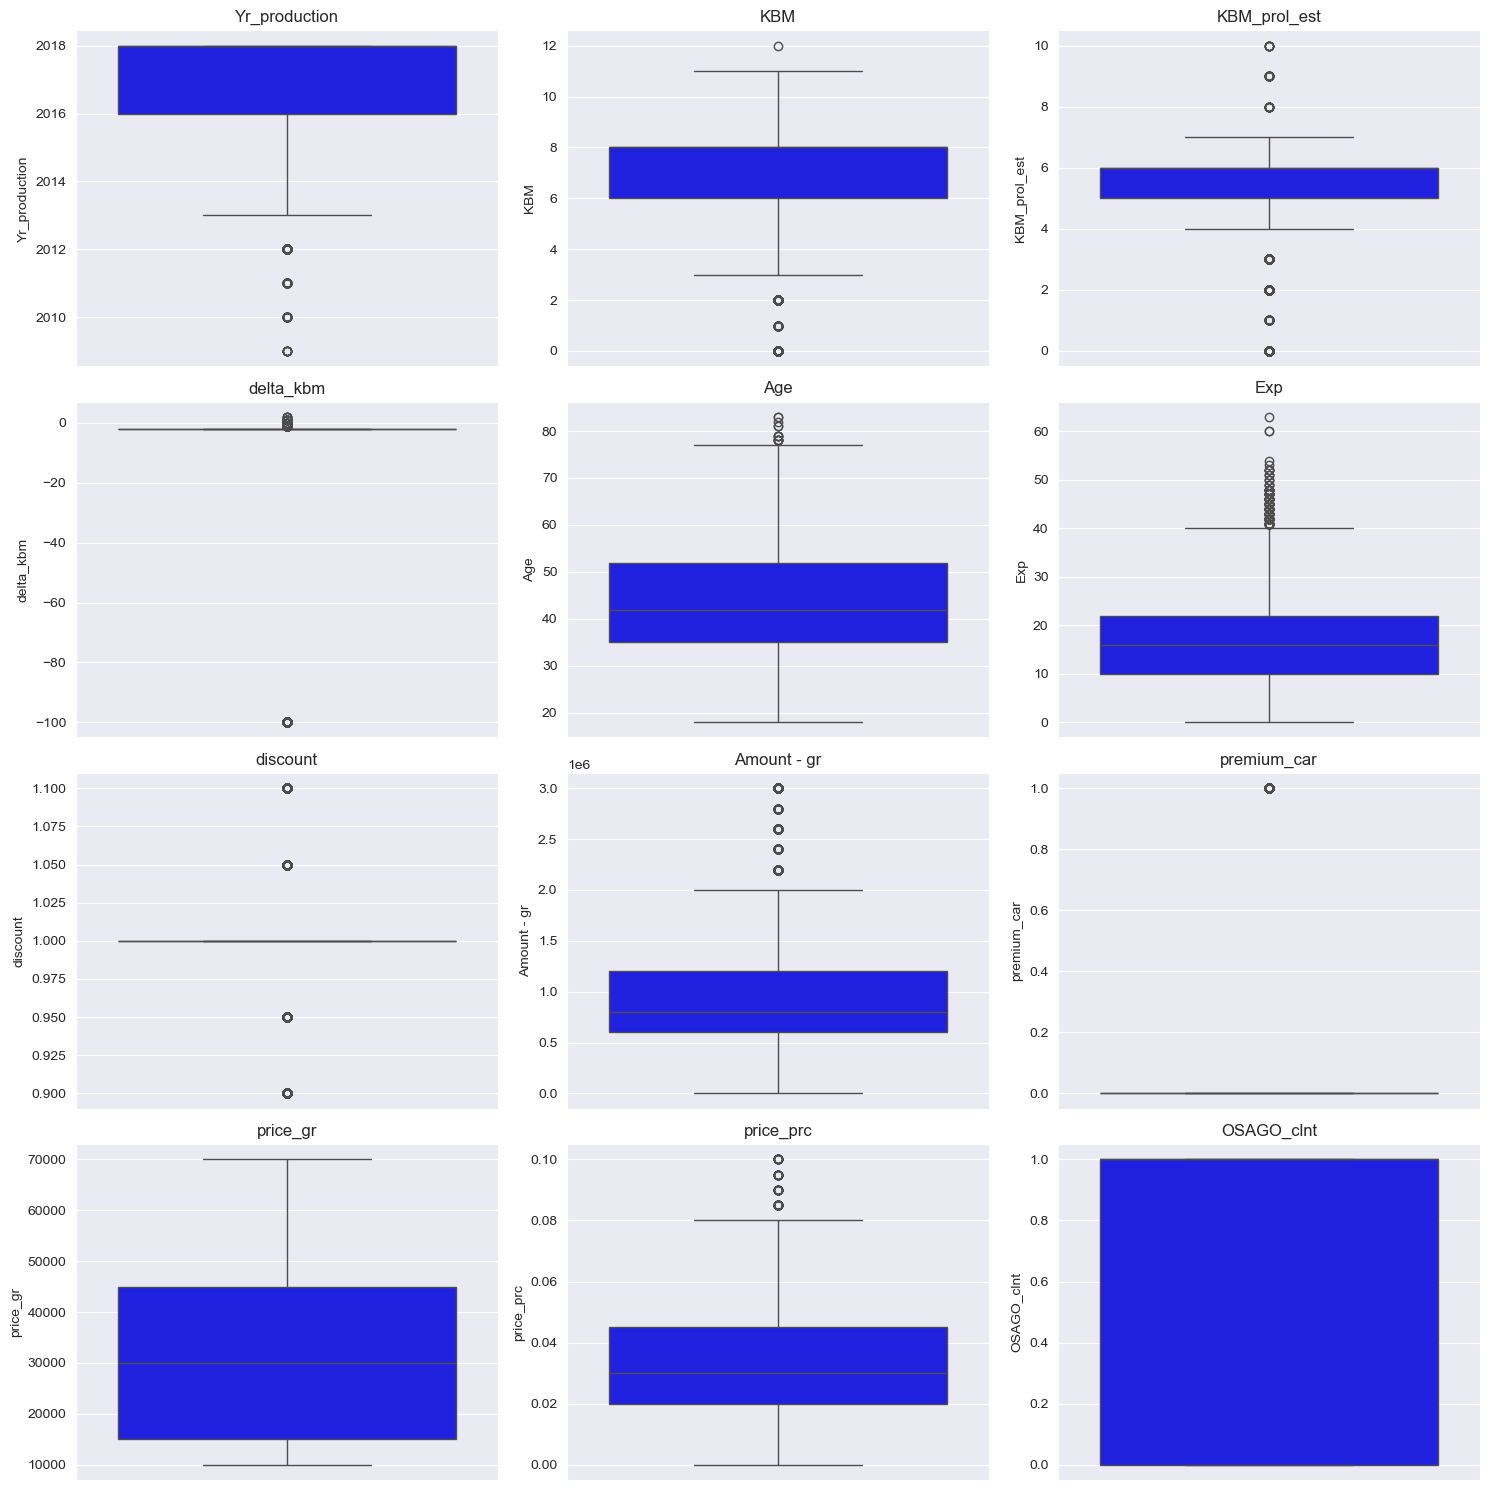

In [22]:
from src.visualizations_utils.box_plots_in_rows import plot_boxplots


plot_boxplots(full_train_data.drop('target', axis=1).select_dtypes(include=['int64', 'float64']), n_cols=3, figsize=(15, 15))

Тут нужно будет подробнее рассмотреть, а что на самом деле является выбросом? Вдруг premium_car оказывает решающее влияние на target?

### Распределение числовых признаков

In [23]:
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('error')

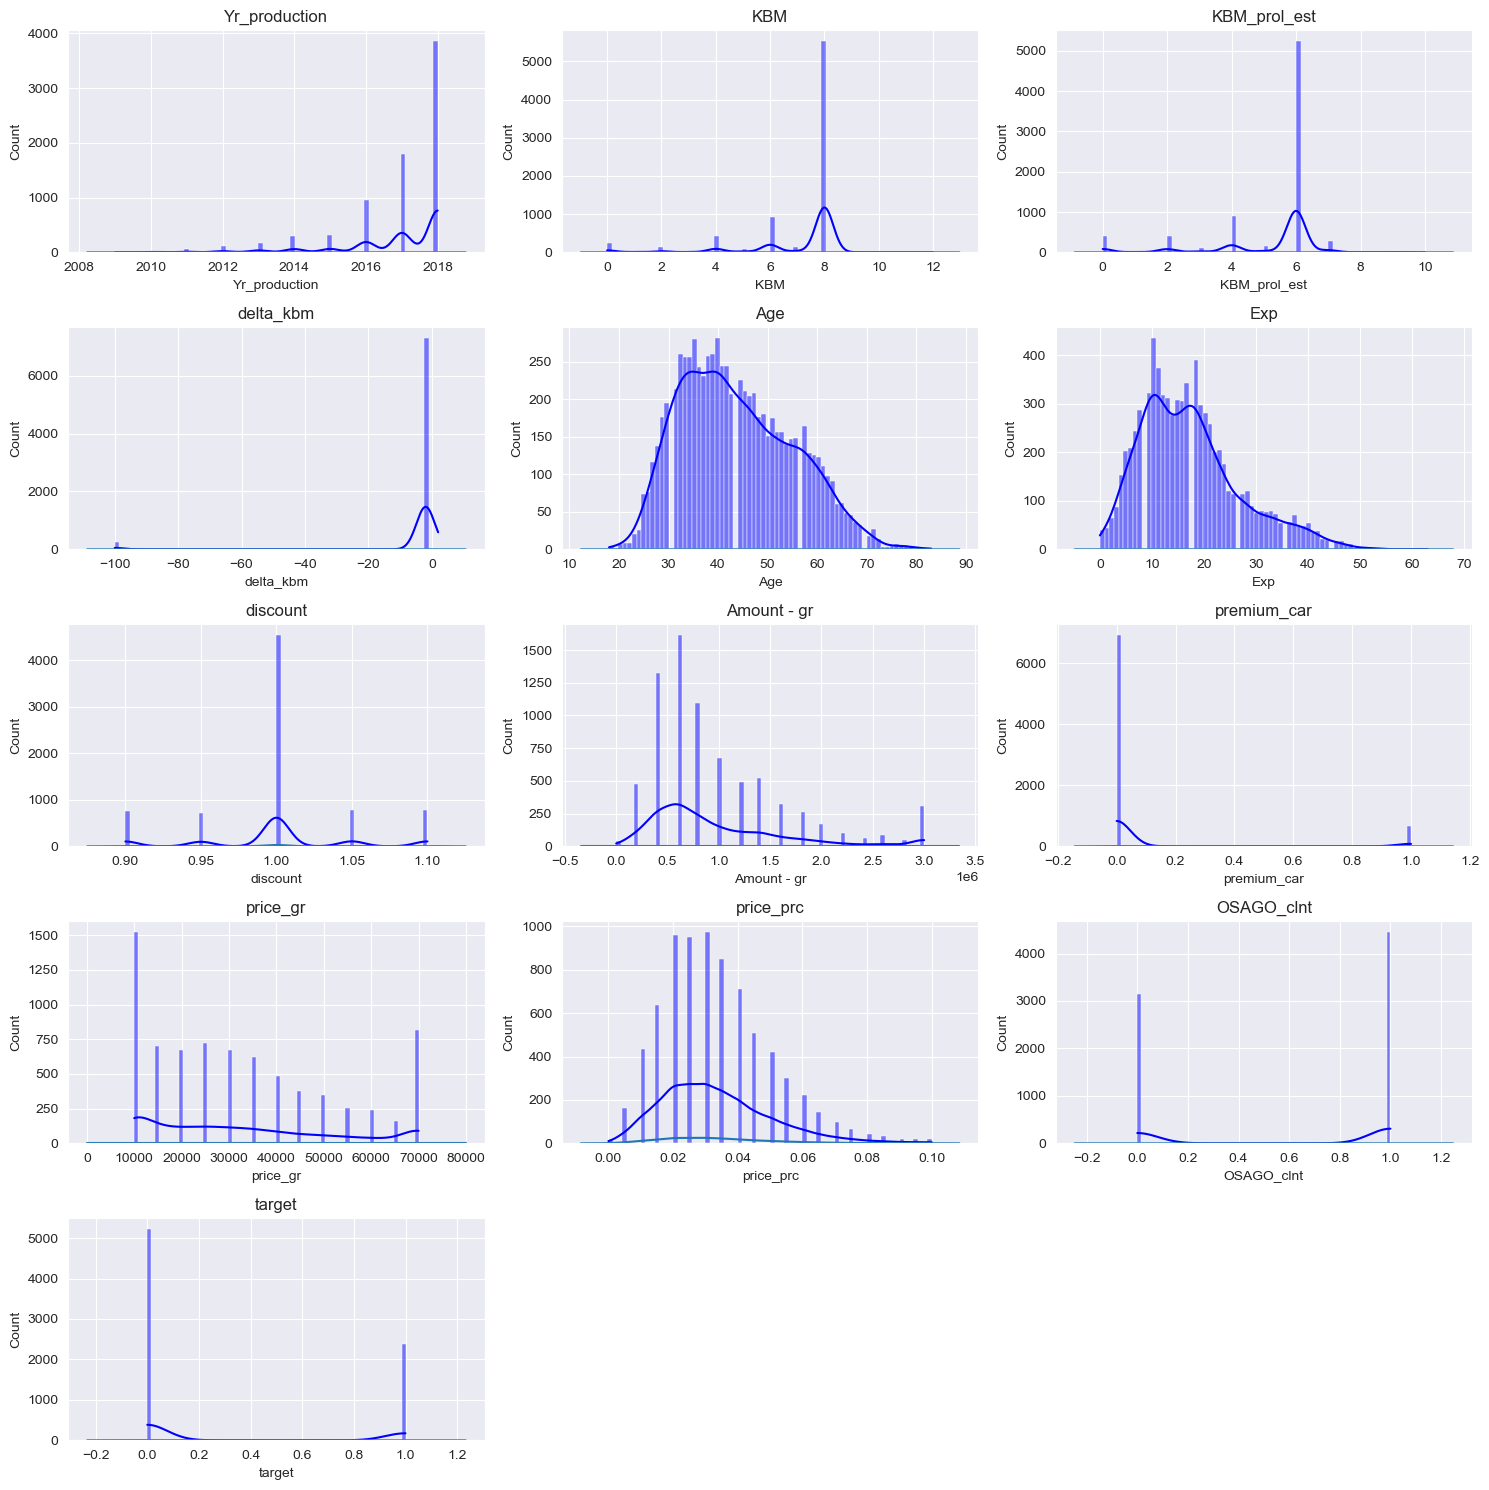

In [24]:
from src.visualizations_utils.histograms_plots_in_rows import plot_histograms

plot_histograms(full_train_data.select_dtypes(include=['int64', 'float64']),
                n_cols=3, bins=70, figsize=(15, 15))

Рассмотрим внимательнее переменные с небольшим количеством уникальных значений

#### 1. delta_kbm (Изменение КБМ)

In [25]:
full_train_data['delta_kbm'].value_counts()

delta_kbm
-2      6924
-1       382
-100     243
 1        34
 0        10
 2         5
Name: count, dtype: int64

Значение "изменение KBM" равный -100 существовать не может. Посмотрим какой target принимают клиенты с таким значением. А также сравним его с target у клиентов с "изменением KBM" равным -2 (большинством)

In [26]:
full_train_data[full_train_data['delta_kbm'] == -100]['target'].value_counts()

target
1    152
0     91
Name: count, dtype: int64

In [27]:
full_train_data[full_train_data['delta_kbm'] == -2]['target'].value_counts()

target
0    4853
1    2071
Name: count, dtype: int64

Не наблюдаем зрительной зависимости

Посчитаем, какой % от общего количества клиентов составляют клиенты с "изменением KBM" равным -100

In [28]:
full_train_data[full_train_data['delta_kbm'] == -100].shape[0] / \
full_train_data.shape[0] * 100

3.1982100552777046

Видим, что таких клиентов меньше 3%. Удалим их

In [29]:
full_train_data = full_train_data.drop(
    full_train_data[full_train_data['delta_kbm'] == -100].index)

#### 2. discount (Скидка к СППГ)

In [30]:
full_train_data['discount'].value_counts()

discount
1.00    4398
1.05     759
1.10     753
0.90     745
0.95     700
Name: count, dtype: int64

3. premium_car (Премиальное ТС)

In [31]:
full_train_data['premium_car'].value_counts()

premium_car
0    6708
1     647
Name: count, dtype: int64

#### 4. OSAGO_clnt (Клиент ОСАГО)

In [32]:
full_train_data['OSAGO_clnt'].value_counts()

OSAGO_clnt
1    4284
0    3071
Name: count, dtype: int64

### Анализ QQ-plot графиков

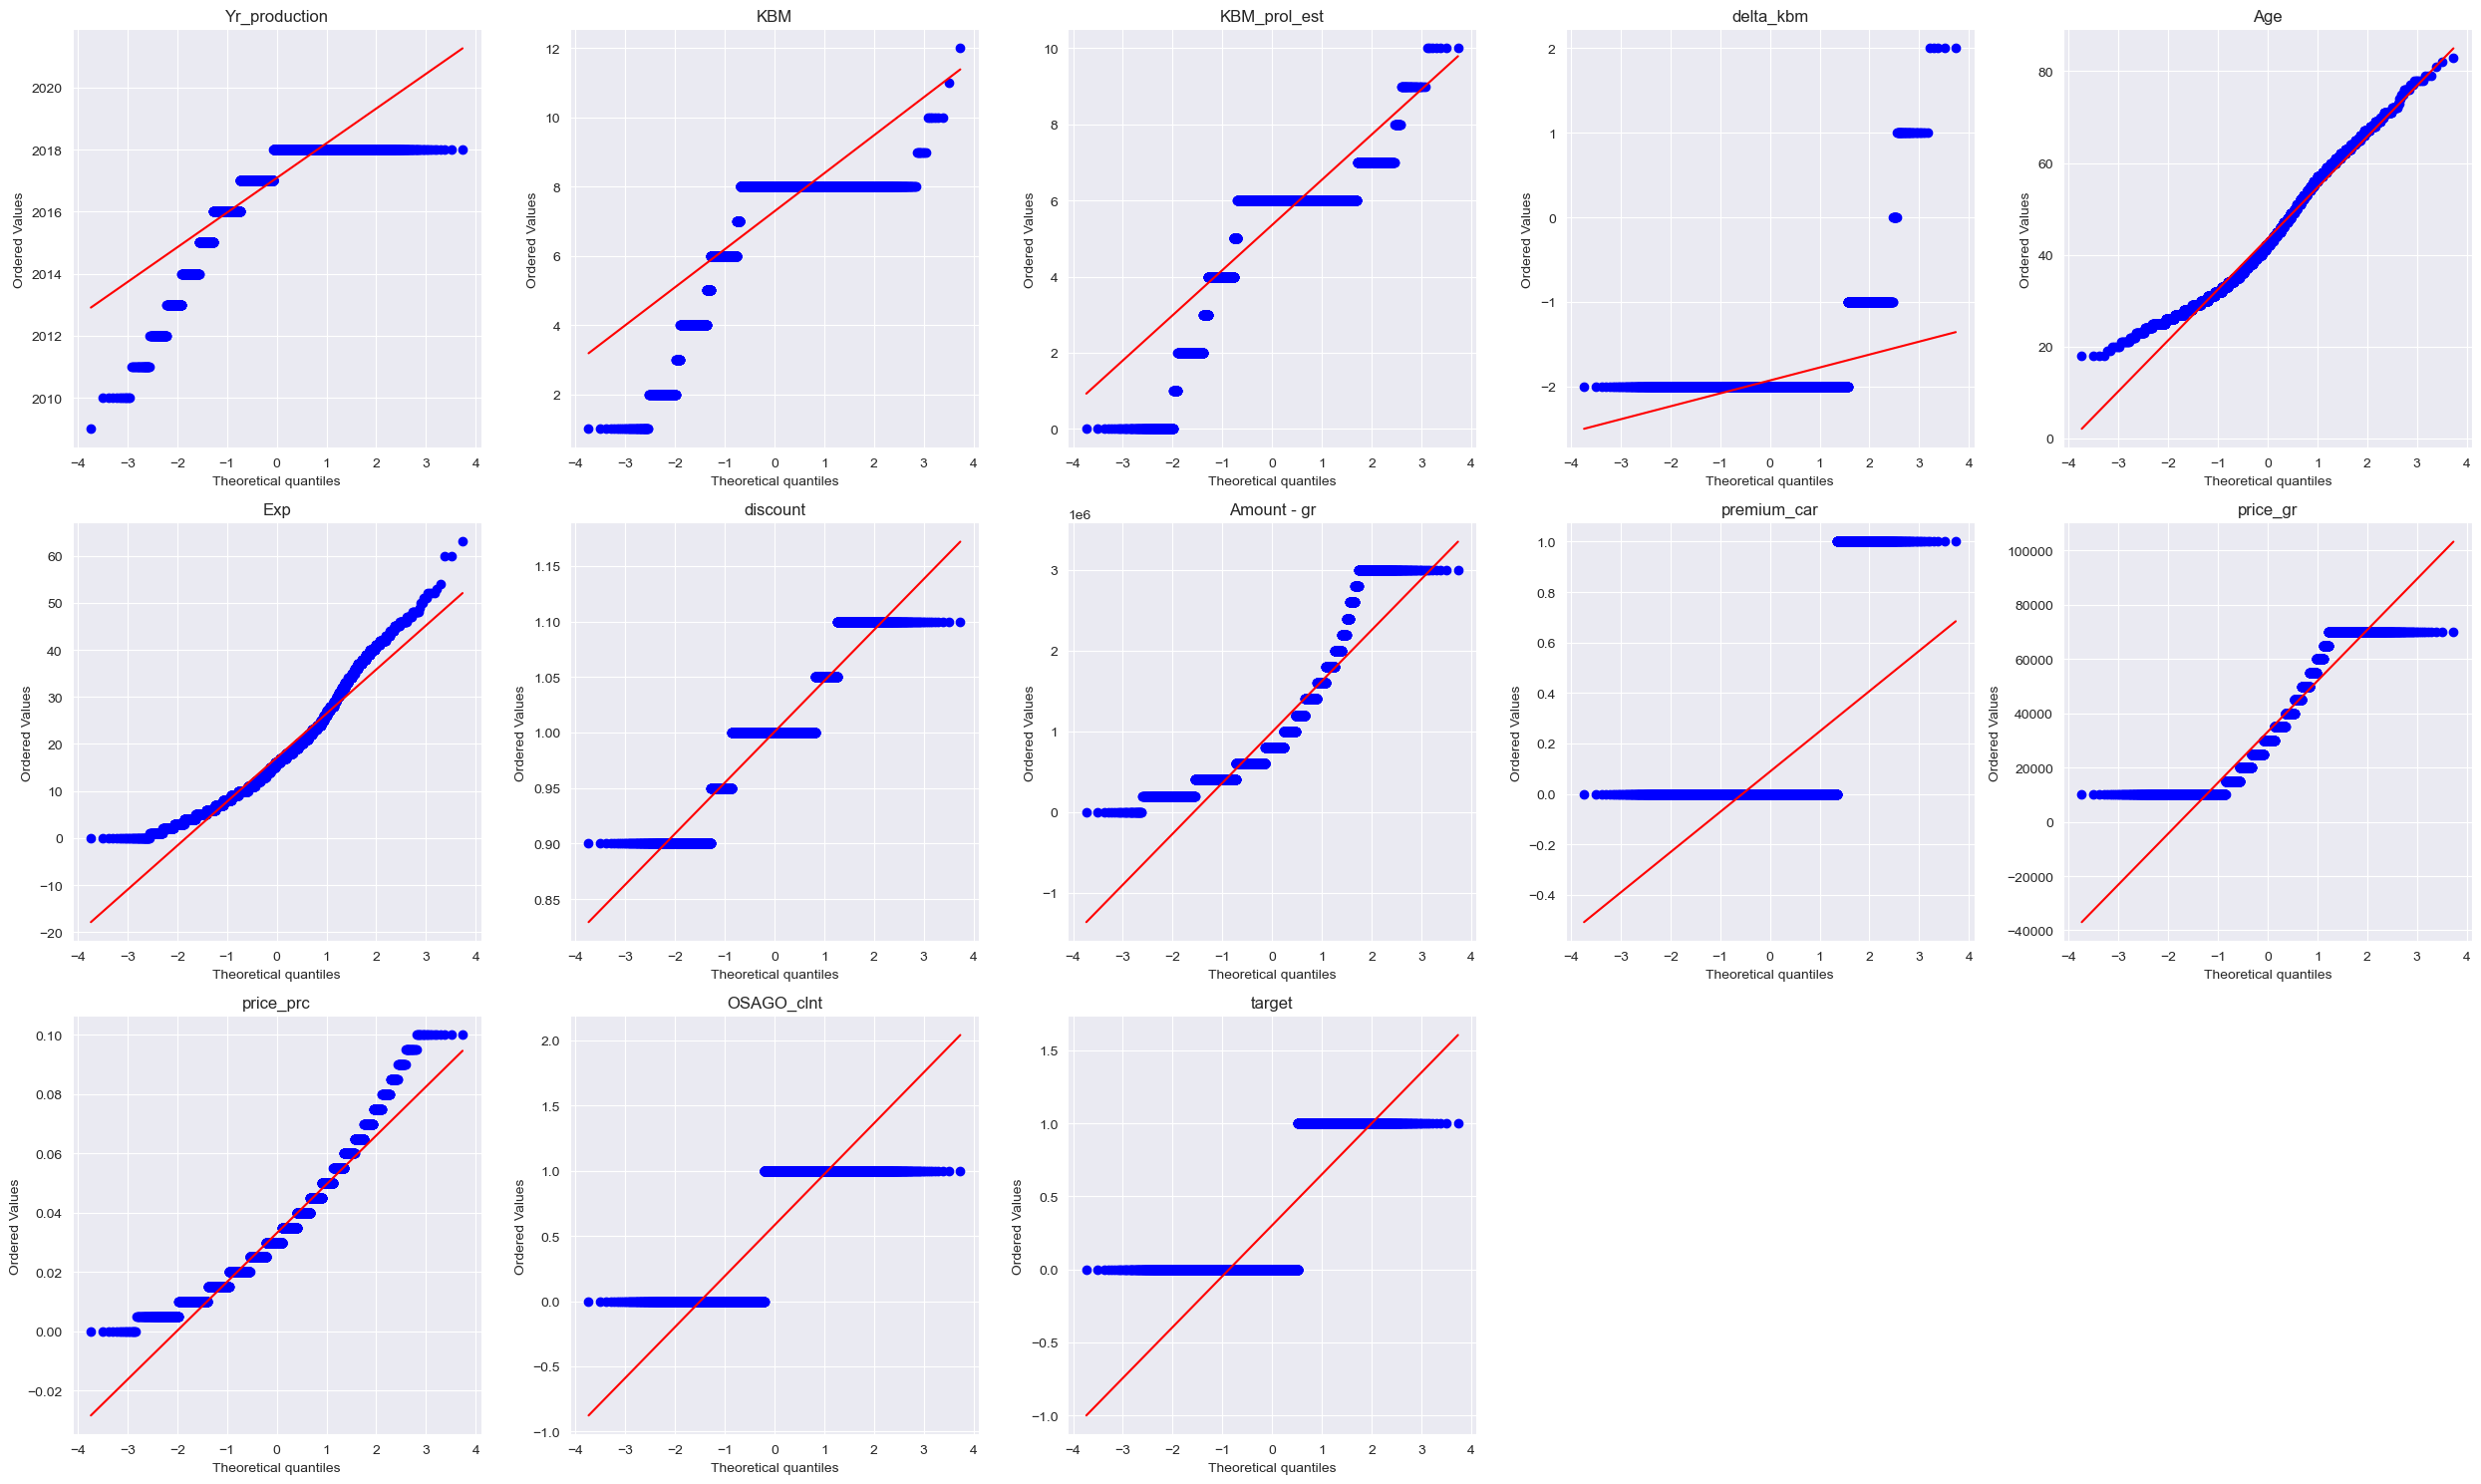

In [33]:
from src.visualizations_utils.qq_plots_in_rows import qq_plots

qq_plots(full_train_data.select_dtypes(include=['int64', 'float64']))

Посмотрим, какие числовые колонки принимают неотрицательные значения и какие строго положительные

In [34]:
full_train_data.select_dtypes(include=['int64', 'float64']).describe().T[
    ['min', 'max']]

,min,max
Yr_production,2009.0,2018.0
KBM,1.0,12.0
KBM_prol_est,0.0,10.0
delta_kbm,-2.0,2.0
Age,18.0,83.0
Exp,0.0,63.0
discount,0.9,1.1
Amount - gr,0.0,3000000.0
premium_car,0.0,1.0
price_gr,10000.0,70000.0


Выделяем признаки с неотрицательными, строго положительными и отрицательными значениями

In [35]:
features = full_train_data.drop(columns=['target'])

non_negative_features = \
    features.select_dtypes(include=['int64', 'float64']).columns[
        features.select_dtypes(include=['int64', 'float64']).min() == 0
        ]

strictly_positive_features = \
    features.select_dtypes(include=['int64', 'float64']).columns[
        features.select_dtypes(include=['int64', 'float64']).min() > 0
        ]

negative_features = \
    features.select_dtypes(include=['int64', 'float64']).columns[
        features.select_dtypes(include=['int64', 'float64']).min() < 0
        ]

Для неотрицательных признаков применим Box-Cox преобразование со смещением

In [36]:
lambda_records = []  # для сохранения значений лямбда

In [37]:
from scipy.special import boxcox1p
import scipy.optimize as opt

for col in non_negative_features:
    x = full_train_data[col].values

    def boxcox1p_likelihood(lmbda):
        return -np.sum(
            -0.5 * np.log(np.var(boxcox1p(x, lmbda))) - (lmbda - 1) * np.sum(
                np.log1p(x)))

    lambda_opt = opt.minimize_scalar(boxcox1p_likelihood, bounds=(-5, 5),
                                     method='bounded').x

    full_train_data[col] = boxcox1p(x, lambda_opt)
    
    lambda_records.append({'feature': col, 'lambda': lambda_opt})

Для положительных признаков применим Box-Cox преобразование без смещения

In [38]:
from scipy.stats import boxcox, boxcox_normmax

for col in strictly_positive_features:
    x = full_train_data[col].values

    try:
        lambda_opt = boxcox_normmax(x, brack=(-5, 5))
    except:
        lambda_opt = 0

    transformed_x = boxcox(x, lambda_opt)
    
    lambda_records.append({'feature': col, 'lambda': lambda_opt})

    full_train_data[col] = transformed_x

In [39]:
lambda_values = pd.DataFrame(lambda_records)

lambda_values = lambda_values.astype({
    'feature': 'category', 
    'lambda': 'float64'
})

In [40]:
lambda_values.to_csv('../../data/data_after_EDA/lambda_values_box-cox.csv',
                       index=False)

Нормализуем все признаки

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
full_train_data[num_features] = scaler.fit_transform(
    full_train_data[num_features])

Посмотрим на QQ-plot графики

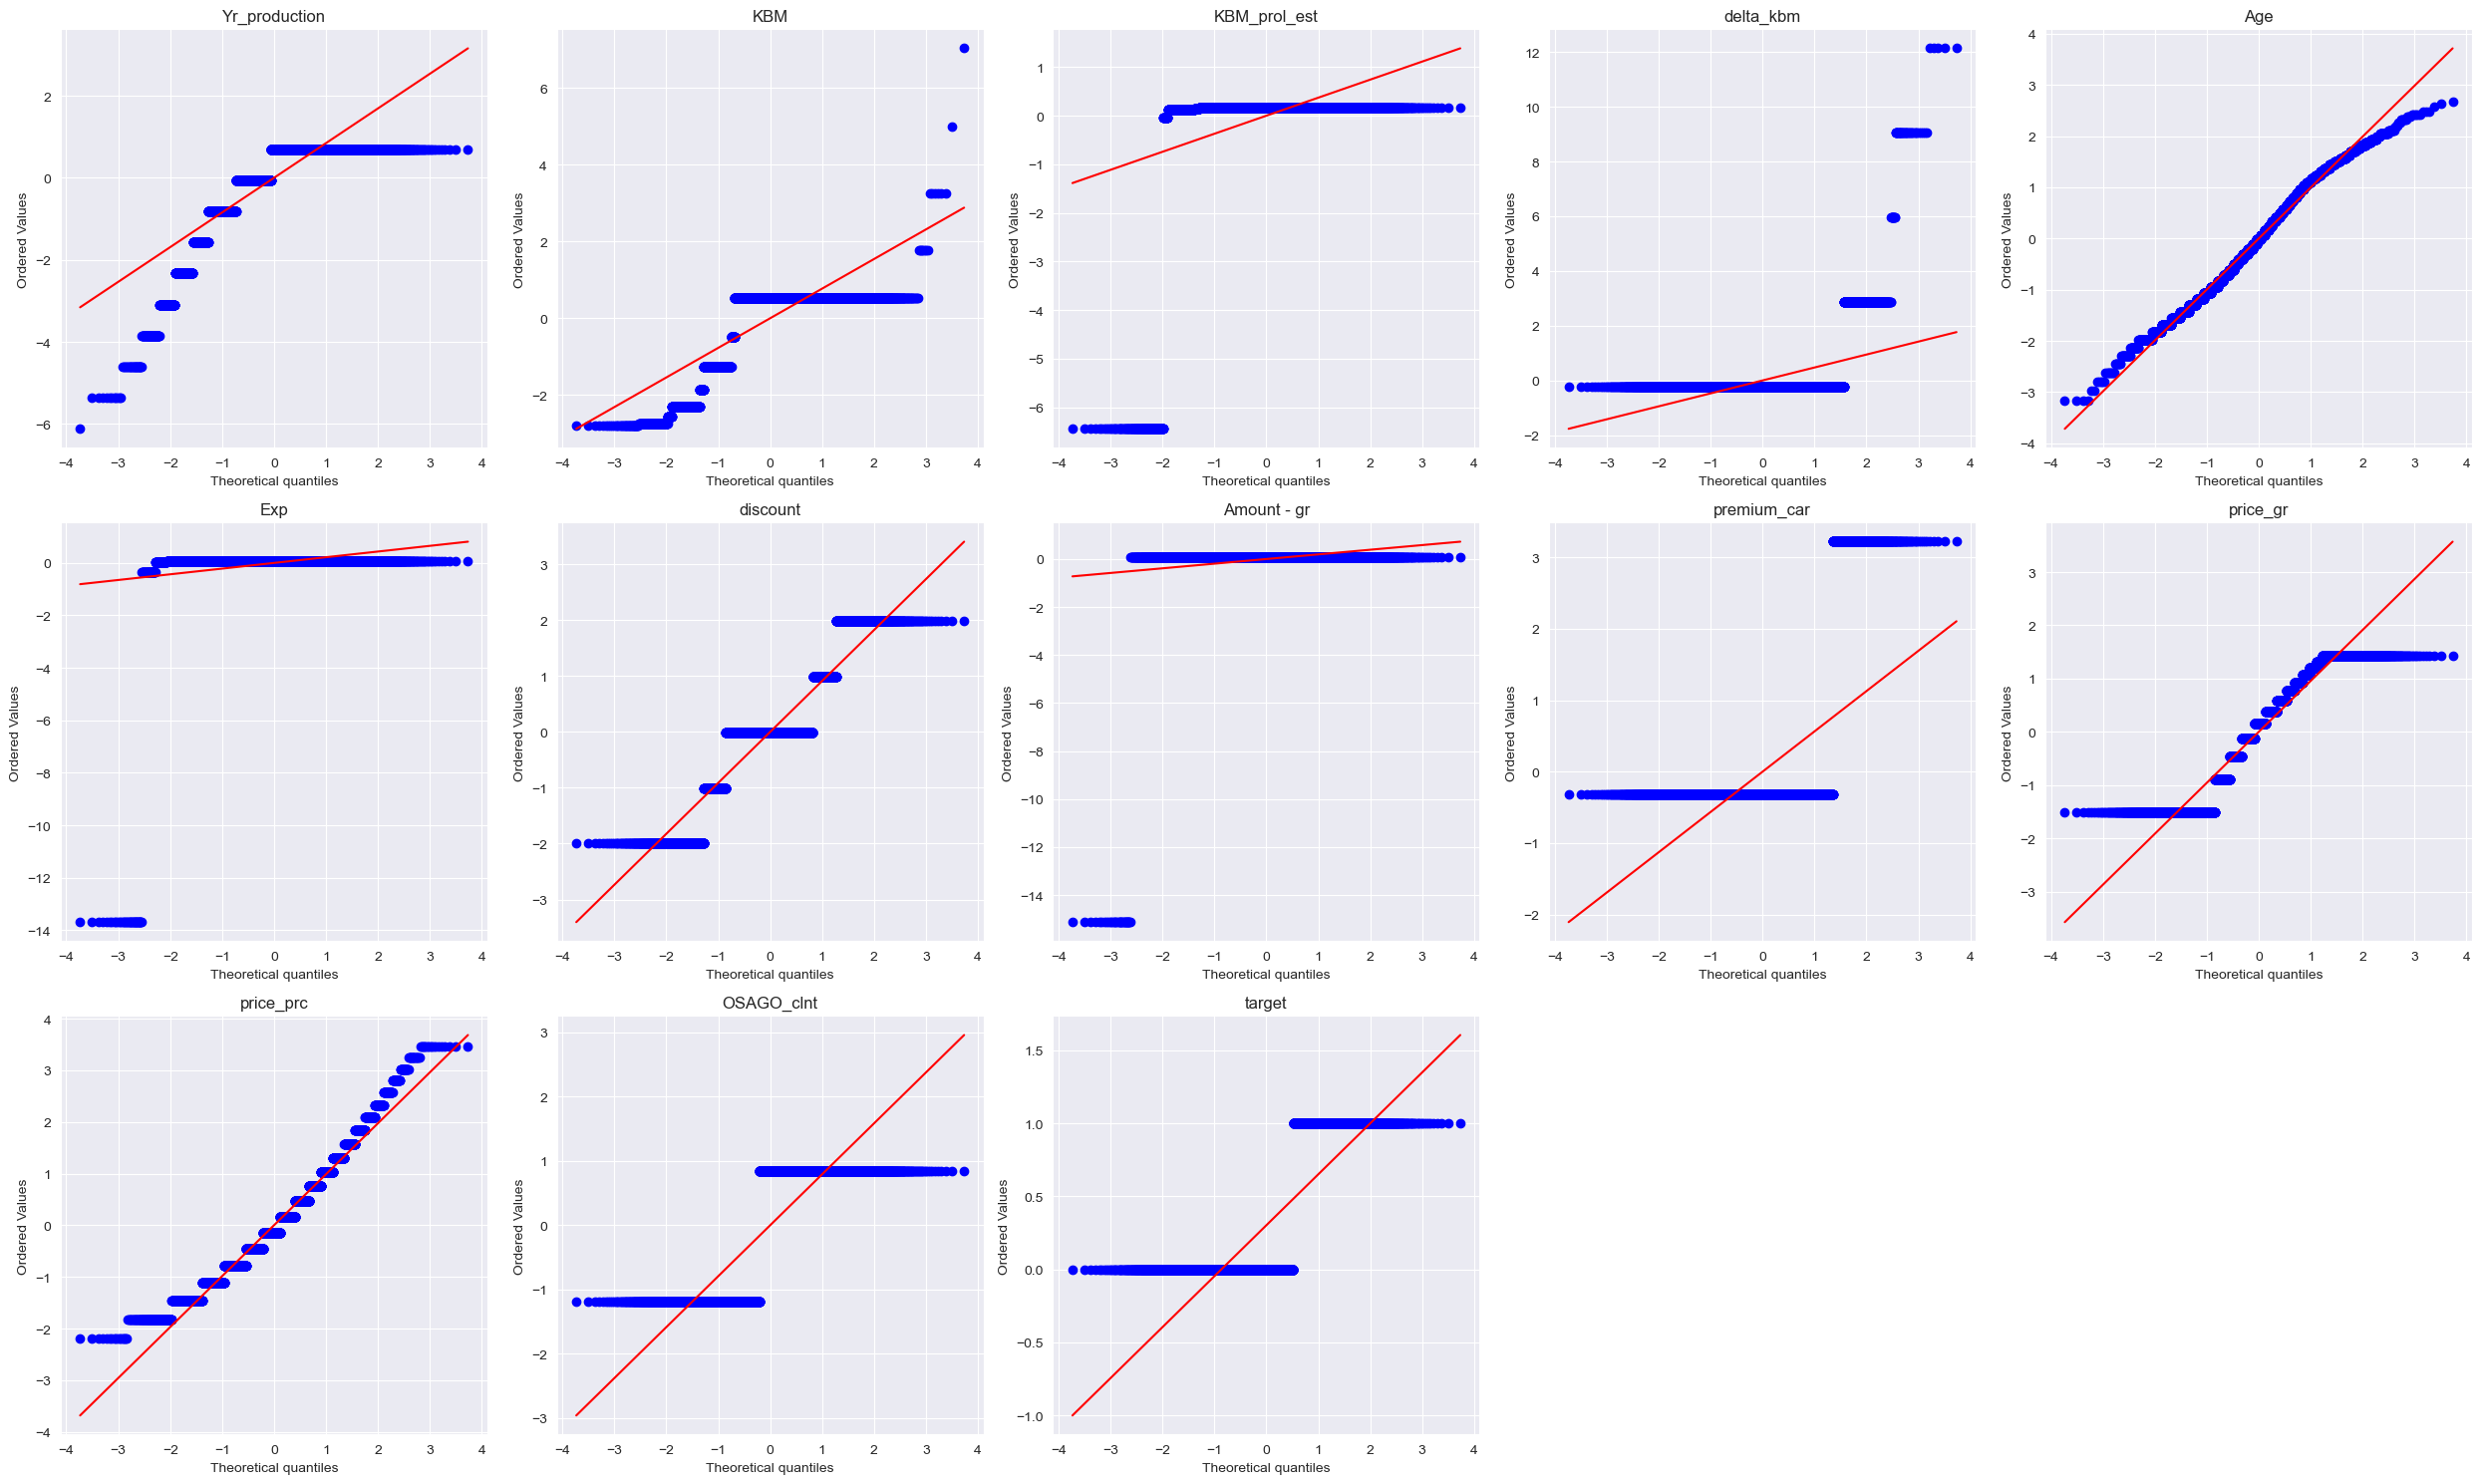

In [42]:
qq_plots(full_train_data.select_dtypes(include=['int64', 'float64']))

## 7. Обработка категориальных признаков

In [43]:
full_train_data.select_dtypes(include=['object']).head(3)

,Filial,Type_ts,passport_region,VIP,Brand,Model,GAP,married,deduct,deduct_amount,product,Bank,channel - map,category,kvs_type,sex
0,Магнитогорский,Иностранные,Челябинская область,Обычный клиент,TOYOTA,RAV 4,Нет,Состоит в браке,Франшиза 2-ой страховой случай,20000+,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,M
1,Магнитогорский,Отечественные,Челябинская область,Обычный клиент,LADA,GRANTA,Нет,Состоит в браке,Без франшизы,0,Компакт,Банк,Автосалоны,RN,Водители согласно перечню,M
2,Ростовский,Отечественные,Ростовская область,Обычный клиент,LADA,GRANTA,Нет,Не состоит в браке,Без франшизы,0,Классика,Банк,Автосалоны,NB 0-1,Водители согласно перечню,F


### Количество уникальных значений в числовых признаках

In [44]:
full_train_data.select_dtypes(include=['object']).nunique()

Filial              22
Type_ts              2
passport_region     85
VIP                  3
Brand               23
Model              183
GAP                  2
married              2
deduct               3
deduct_amount        3
product              4
Bank                 3
channel - map        2
category             4
kvs_type             2
sex                  2
dtype: int64

Рассмотрим внимательнее переменные с небольшим количеством уникальных значений

#### 1. Type_ts (Тип ТС)

In [45]:
full_train_data['Type_ts'].value_counts()

Type_ts
Иностранные      5641
Отечественные    1714
Name: count, dtype: int64

#### 2. VIP (VIP клиент)

In [46]:
full_train_data['VIP'].value_counts()

VIP
Обычный клиент     7157
Особый статус +     146
Особый статус        52
Name: count, dtype: int64

In [47]:
full_train_data['GAP'].value_counts()

GAP
Нет    6603
Да      752
Name: count, dtype: int64

#### 4. married (Брак)

In [48]:
full_train_data['married'].value_counts()

married
Состоит в браке       5753
Не состоит в браке    1602
Name: count, dtype: int64

#### 5. deduct (Тип франшизы)

In [49]:
full_train_data['deduct'].value_counts()

deduct
Без франшизы                      4889
Безусловная франшиза              1812
Франшиза 2-ой страховой случай     654
Name: count, dtype: int64

#### 6. product (Продукт)

In [50]:
full_train_data['product'].value_counts()

product
Классика     5191
Компакт      1583
Уверенный     393
Legacy        188
Name: count, dtype: int64

#### 7. Bank (Машина в залоге банка)

In [51]:
full_train_data['Bank'].value_counts()

Bank
Банк         4034
Без банка    2188
Сетелем      1133
Name: count, dtype: int64

#### 8. channel - map (Канал)

In [52]:
full_train_data['channel - map'].value_counts()

channel - map
Автосалоны    5776
Розница       1579
Name: count, dtype: int64

#### 9. category (Тип бизнеса)

In [53]:
full_train_data['category'].value_counts()

category
NB 0-1     4229
RN         2454
NB 2+       343
RN sppg     329
Name: count, dtype: int64

#### 10. kvs_type (Тип ЛДУ)

In [54]:
full_train_data['kvs_type'].value_counts()

kvs_type
Водители согласно перечню                                          7284
Ограничение по стажу и возрасту, без ограничения количества лиц      71
Name: count, dtype: int64

#### 11. sex (Пол)

In [55]:
full_train_data['sex'].value_counts()

sex
M    4854
F    2501
Name: count, dtype: int64

### Замена категориальных признаков числовыми

Для этого используем Mean Target Encoding

$$
\frac{N*mean+\alpha*global\_mean}{N+\alpha}
$$

где $\alpha$ возьмем равным 1

In [56]:
from sklearn.model_selection import train_test_split
from src.data_utils.mean_target_encoder import \
    apply_mean_target_encoder_encoding

X = full_train_data.drop('target', axis=1)
y = full_train_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=42)

X_train_encoded, X_test_encoded = apply_mean_target_encoder_encoding(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    cat_features=cat_features,
    n_jobs=4
)

print("Тренировочные данные после кодирования:")
print(X_train_encoded.head())

print("\nТестовые данные после кодирования:")
print(X_test_encoded.head())

100%|██████████| 16/16 [00:02<00:00,  6.32it/s]


Тренировочные данные после кодирования:
      Yr_production       KBM  KBM_prol_est  delta_kbm       Age       Exp  \
6394       0.691971  0.528202      0.158085  -0.220093 -1.692541  0.076054   
98         0.691971  0.528202      0.158085  -0.220093 -1.057423  0.076232   
3871      -0.819061  0.528202      0.158085  -0.220093  0.245171  0.076286   
2182      -0.819061 -2.289859      0.152032   2.869190  1.814715  0.076287   
4968       0.691971  0.528202      0.158085  -0.220093 -1.299767  0.076250   

      discount  Amount - gr  premium_car  price_gr  ...  GAP_encoded  \
6394 -0.013324     0.066104     3.219915  1.434520  ...     0.289321   
98   -0.013324     0.066104    -0.310567  0.153161  ...     0.291651   
3871 -1.003843     0.066104    -0.310567 -1.508257  ...     0.406113   
2182 -0.013324     0.066104    -0.310567 -0.460019  ...     0.291950   
4968 -0.013324     0.066104    -0.310567  1.434520  ...     0.291950   

      married_encoded  deduct_encoded  deduct_amount_encod

Отредактируем названия признаков

In [57]:
X_train_encoded.columns = X_train_encoded.columns.str.replace(' ', '')
X_train_encoded.columns = X_train_encoded.columns.str.replace('-', '_')
X_test_encoded.columns = X_test_encoded.columns.str.replace(' ', '')
X_test_encoded.columns = X_test_encoded.columns.str.replace('-', '_')

In [58]:
# Сохраним закодированные данные в формате csv
X_train_encoded['target'] = y_train
X_test_encoded['target'] = y_test

X_train_encoded.to_csv('../../data/data_after_EDA/train_encoded.csv', index=False)
X_test_encoded.to_csv('../../data/data_after_EDA/test_encoded.csv', index=False)

## 8. Анализ зависимостей

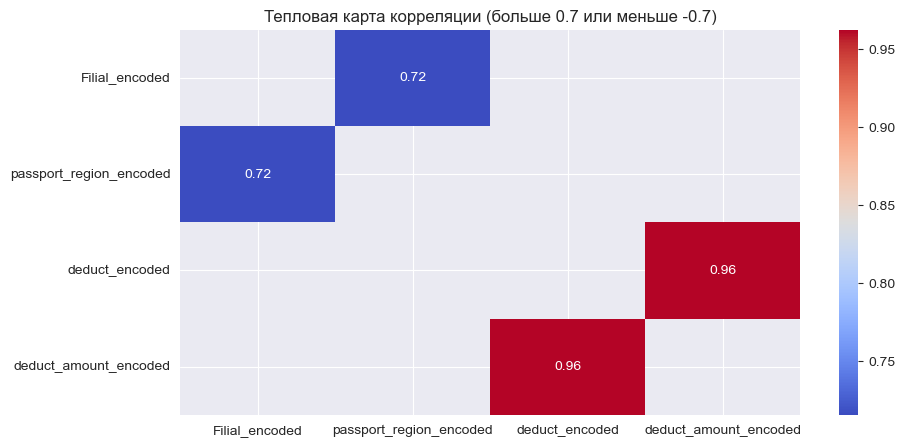

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matrix = X_train_encoded.corr()

mask_high = corr_matrix > 0.7
mask_low = corr_matrix < -0.7

mask_combined = mask_high | mask_low

# Заменяем самокорреляцию (где корреляция = 1)
np.fill_diagonal(mask_combined.values, False)

filtered_corr_matrix = corr_matrix.where(mask_combined)

filtered_corr_matrix = filtered_corr_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')

plt.figure(figsize=(10, 5))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляции (больше 0.7 или меньше -0.7)')
plt.grid(True)
plt.show()